### GEREKLİ KÜTÜPHANELER

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #regresyon metrikleri
from sklearn.feature_extraction.text import TfidfVectorizer #metin verilerini sayısal değere dönüştürür.
from sklearn.linear_model import Ridge, Lasso # overfittingi azaltmak için kullanılır.
from sklearn.ensemble import RandomForestRegressor



In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataFrame = pd.read_csv(r"C:\Users\ahmet\Downloads\Talent_Academy_Case_DT_2025.csv")

In [5]:
dataFrame.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [6]:
dataFrame.info() #integer: nümerik, object: kategorik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [7]:
dataFrame.shape

(2235, 13)

In [8]:
dataFrame.isnull().sum()

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64

### Veri Önişleme

In [9]:
dataFrame['TedaviSuresi'] = dataFrame['TedaviSuresi'].str.replace(' Seans','').astype(int)


In [10]:
dataFrame['UygulamaSuresi'] = dataFrame['UygulamaSuresi'].str.replace(' Dakika','').astype(int)

In [11]:
dataFrame.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5,Ayak Bileği,20
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,20
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,5
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20


### Keşifsel Veri Analizi (EDA)

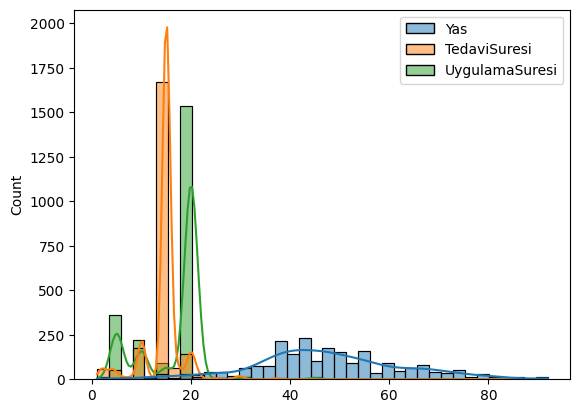

In [12]:
sbn.histplot(dataFrame[['Yas','TedaviSuresi','UygulamaSuresi']], kde=True) 
plt.show()

### Yaş Dağılımı: 20 ile 80 yaş arasında geniş bir dağılım vardır. En çok 40 ile 50 yaş aralığı önce çıkmıştır.
### Tedavi Süresi ve Uygulama Süresi Dağılımı: İkisi de sağa çarpık bir yapıdadır. Çoğu hasta kısa süreli tadavi görüyor. İkisinin de tepe noktaları 20 gün civarındadır.

In [13]:
dataFrame.describe()

,HastaNo,Yas,TedaviSuresi,UygulamaSuresi
count,2235.000000,2235.000000,2235.000000,2235.000000
mean,145333.100224,47.327069,14.570917,16.573154
std,115.214248,15.208634,3.725322,6.268635
min,145134.000000,2.000000,1.000000,3.000000
25%,145235.000000,38.000000,15.000000,10.000000
50%,145331.000000,46.000000,15.000000,20.000000
75%,145432.000000,56.000000,15.000000,20.000000
max,145537.000000,92.000000,37.000000,45.000000


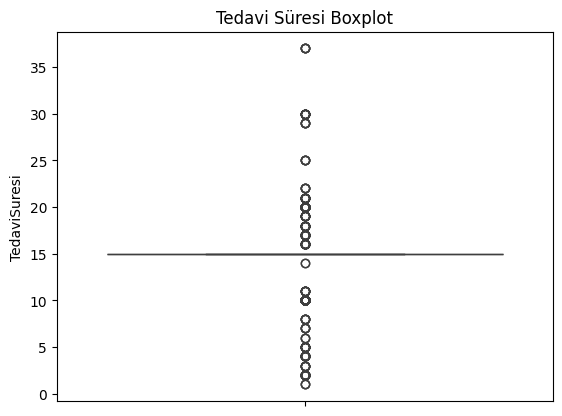

In [14]:
sbn.boxplot(y=dataFrame['TedaviSuresi'])
plt.title('Tedavi Süresi Boxplot')
plt.show()

### Bu grafiğin medyanı 15 gün civarındadır. Hastaların yarısı 15 günden fazla diğer yarısı 15 günden az tedavi görmüştür. Kutunun dışında kalan bazı noktalar vardır, bunlar aykırı değerlerdir. Kutu grafiğinin tek bir çizgi üstünde olması ise çoğunluk verinin tek değerde yoğunlaşmasıdır.

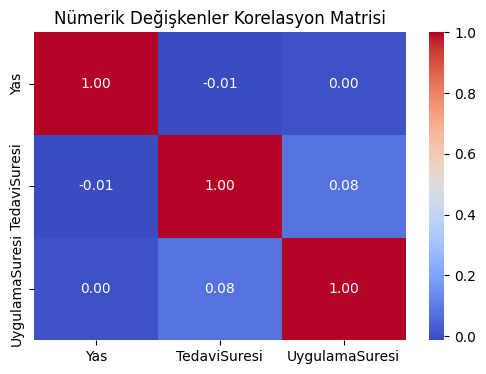

In [15]:
numerik_sutunlar = ['Yas','TedaviSuresi','UygulamaSuresi']

corr = dataFrame[numerik_sutunlar].corr()

plt.figure(figsize=(6,4))
sbn.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Nümerik Değişkenler Korelasyon Matrisi")
plt.show()

### Yaş ve Tedavi süresindeki koralasyon katsayısı -0.01, bu 0'a yakın bir değer olduğu için iki kolon arasında bir ilişki olmadığını bize gösterir. Diğer bir örnek, Tedavi süresi ve uygulama süresi arasında ise korelasyon katsayısı 0.08'dir. Bu ise çok zayıf pozitif ilişkiye karşılık gelmektedir.

In [16]:
categorical_cols = ['Cinsiyet','KanGrubu','Uyruk','KronikHastalik','Bolum','Alerji','Tanilar','TedaviAdi','UygulamaYerleri']

for col in categorical_cols:
    print(dataFrame[col].value_counts())
    print(dataFrame[col].value_counts(normalize=True))



Cinsiyet
Kadın    1274
Erkek     792
Name: count, dtype: int64
Cinsiyet
Kadın    0.616651
Erkek    0.383349
Name: proportion, dtype: float64
KanGrubu
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64
KanGrubu
0 Rh+     0.371154
A Rh+     0.346154
B Rh+     0.132051
AB Rh+    0.051282
B Rh-     0.043590
A Rh-     0.033974
0 Rh-     0.016667
AB Rh-    0.005128
Name: proportion, dtype: float64
Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64
Uyruk
Türkiye       0.972260
Tokelau       0.012081
Arnavutluk    0.005817
Azerbaycan    0.005369
Libya         0.004474
Name: proportion, dtype: float64
KronikHastalik
Myastenia gravis                                                                38
Aritmi                                                                          36
Fascioscapulohumeral Distrofi                           

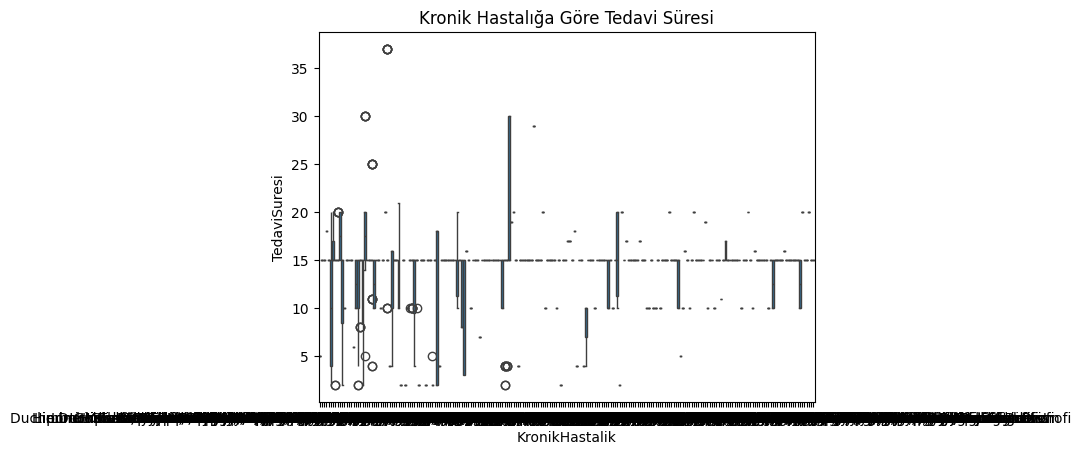

In [17]:
sbn.boxplot(x='KronikHastalik', y='TedaviSuresi', data=dataFrame)
plt.title('Kronik Hastalığa Göre Tedavi Süresi')
plt.show()

### Bu grafik, kronik hastalık türleri arasında tedavi sürelerinin ortalama olarak büyük farklılıklar göstermediğini ortaya koyuyor.

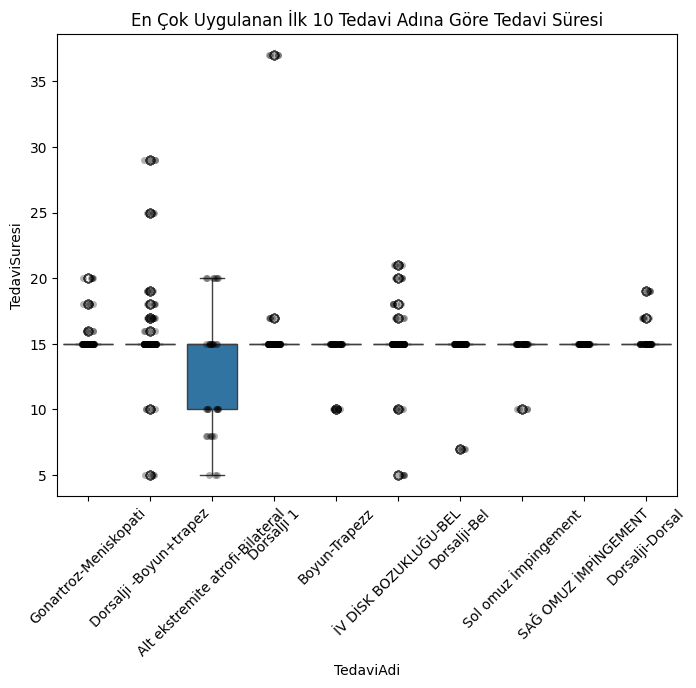

In [18]:
tedavi_sayilari = dataFrame['TedaviAdi'].value_counts()

# En çok geçen ilk 10 tedavi adı
top10_tedavi = tedavi_sayilari.head(10).index

# Sadece bu tedavileri filtrele
dataFrame_top10 = dataFrame[dataFrame['TedaviAdi'].isin(top10_tedavi)]


plt.figure(figsize=(8,6))
sbn.boxplot(data=dataFrame_top10, x="TedaviAdi", y="TedaviSuresi")
sbn.stripplot(data=dataFrame_top10, x="TedaviAdi", y="TedaviSuresi", color="black", alpha=0.3)

plt.title("En Çok Uygulanan İlk 10 Tedavi Adına Göre Tedavi Süresi")
plt.xticks(rotation=45)
plt.show()

### Grafikteki diğer tedavilere göre, "Dorsalji -Boyun+trapez" için çizilen kutu grafiği, medyanın altında yer alıyor ve daha geniş bir dağılıma sahip. Bu durum, bu tedavi türünde diğerlerine göre daha değişken tedavi sürelerinin görüldüğünü gösteriyor.

In [19]:
dataFrame[["TedaviAdi","TedaviSuresi"]].groupby(["TedaviAdi"],as_index=False).mean().sort_values(by="TedaviSuresi",ascending=False)

,TedaviAdi,TedaviSuresi
218,Travmatik beyin yaralanması,30.0
137,Parapleji-Tetrapleji,30.0
33,Boyun,22.0
27,Bel,21.0
139,Parmak protezi,21.0
...,...,...
226,Yürüme eğitimi,2.0
231,onur,2.0
132,Omuz Post Op İzometrik,1.0
209,Spinal manüpilasyon,1.0


In [20]:
dataFrame[["KronikHastalik","TedaviSuresi"]].groupby(["KronikHastalik"],as_index=False).mean().sort_values(by="TedaviSuresi",ascending=False)

,KronikHastalik,TedaviSuresi
219,"Polimiyozit, Myastenia gravis",29.000000
183,"Limb-Girdle Musküler Distrofi, Kalp yetmezliği...",20.185185
22,"Aritmi, Polimiyozit, Hipertiroidizm, Becker Mu...",20.000000
58,"Diyabet, Fascioscapulohumeral Distrofi, Kalp y...",20.000000
129,"Hiportiroidizm, Aritmi, Becker Musküler Distro...",20.000000
...,...,...
100,"Fascioscapulohumeral Distrofi, Myastenia gravi...",2.000000
132,"Hiportiroidizm, Becker Musküler Distrofisi",2.000000
175,"Limb-Girdle Musküler Distrofi, Duchenne Muskül...",2.000000
194,"Myastenia gravis, Duchenne Musküler Distrofisi...",2.000000


### Eksik Değerleri Doldurma

In [21]:
dataFrame["Cinsiyet"].fillna(dataFrame["Cinsiyet"].mode()[0], inplace=True)
dataFrame["KanGrubu"].fillna("Unknown", inplace=True) 
dataFrame["KronikHastalik"].fillna("Yok", inplace=True)                  
dataFrame["Alerji"].fillna("Yok", inplace=True)                            
dataFrame["UygulamaYerleri"].fillna(dataFrame["UygulamaYerleri"].mode()[0], inplace=True)  
dataFrame["Tanilar"].fillna(dataFrame["Tanilar"].mode()[0], inplace=True)  
dataFrame["Bolum"].fillna(dataFrame["Bolum"].mode()[0], inplace=True)  

In [22]:
dataFrame.isnull().sum()

HastaNo            0
Yas                0
Cinsiyet           0
KanGrubu           0
Uyruk              0
KronikHastalik     0
Bolum              0
Alerji             0
Tanilar            0
TedaviAdi          0
TedaviSuresi       0
UygulamaYerleri    0
UygulamaSuresi     0
dtype: int64

In [23]:
le = LabelEncoder()
dataFrame['Cinsiyet_encoded']= le.fit_transform(dataFrame['Cinsiyet'])
dataFrame['Uyruk_encoded'] = le.fit_transform(dataFrame['Uyruk'])
dataFrame['KanGrubu_encoded'] = le.fit_transform(dataFrame['KanGrubu']) #kategorik verileri sayısal değerlere dönüştürür.

In [24]:
dataFrame_encoded= pd.get_dummies(dataFrame, columns=['Tanilar', 'TedaviAdi']) #one-hot encoding: kategoriler arasında sıralama yoksa kullanılır.

In [25]:
tfidf_tanilar = TfidfVectorizer(max_features=100)
tanilar_vectorized = tfidf_tanilar.fit_transform(dataFrame['Tanilar'])
tanilar_dataFrame = pd.DataFrame(tanilar_vectorized.toarray(), columns=tfidf_tanilar.get_feature_names_out())

tfidf_tedavi = TfidfVectorizer(max_features=50)
tedavi_vectorized = tfidf_tedavi.fit_transform(dataFrame['TedaviAdi'])
tedavi_dataFrame = pd.DataFrame(tedavi_vectorized.toarray(), columns=tfidf_tedavi.get_feature_names_out())

In [26]:
dataFrame_kronik = dataFrame['KronikHastalik'].str.get_dummies(sep=',')
dataFrame_kronik.columns = ['KronikHastalik_' + col.strip() for col in dataFrame_kronik.columns]
dataFrame_alerji = dataFrame['Alerji'].str.get_dummies(sep=',')
dataFrame_alerji.columns = ['Alerji_' + col.strip() for col in dataFrame_alerji.columns]
dataFrame_final = pd.concat([dataFrame.drop(['KronikHastalik', 'Alerji'], axis=1), dataFrame_kronik, dataFrame_alerji], axis=1)

In [27]:
dataFrame.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,Cinsiyet_encoded,Uyruk_encoded,KanGrubu_encoded
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5,Ayak Bileği,20,1,4,0
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,20,0,4,0
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20,0,4,0
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,5,0,4,0
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20,0,4,0


### Ölçeklendirme

In [28]:
num_scaler=['Yas', 'TedaviSuresi', 'UygulamaSuresi']
scaler = StandardScaler()
dataFrame[num_scaler] = scaler.fit_transform(dataFrame[num_scaler])

In [29]:
tedavi_sayisi = dataFrame['HastaNo'].value_counts().reset_index()
tedavi_sayisi.columns = ['HastaNo', 'Toplam_Tedavi_Sayisi']
dataFrame = dataFrame.merge(tedavi_sayisi, on='HastaNo', how='left')

In [30]:
dataFrame.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,Cinsiyet_encoded,Uyruk_encoded,KanGrubu_encoded,Toplam_Tedavi_Sayisi
0,145134,0.833459,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,-2.569726,Ayak Bileği,0.546788,1,4,0,1
1,145135,-1.271080,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,0.115206,Boyun,0.546788,0,4,0,5
2,145135,-1.271080,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,0.115206,"Boyun,Sırt",0.546788,0,4,0,5
3,145135,-1.271080,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,0.115206,Boyun,-1.846613,0,4,0,5
4,145135,-1.271080,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,0.115206,"Boyun,Sırt",0.546788,0,4,0,5


### Model Eğitme

In [31]:
X = pd.concat([dataFrame[['Yas', 'UygulamaSuresi', 'Cinsiyet_encoded', 'KanGrubu_encoded', 'Uyruk_encoded']],
               tanilar_dataFrame, tedavi_dataFrame], axis=1)
y = dataFrame['TedaviSuresi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_preds = lr_model.predict(X_test_scaled)

In [34]:
print("Linear Regression MAE:", mean_absolute_error(y_test, lr_preds))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("Linear Regression R2:", r2_score(y_test, lr_preds))

Linear Regression MAE: 0.5046601363585316
Linear Regression RMSE: 0.8949644074249413
Linear Regression R2: 0.2751297626755529


In [35]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_preds = lasso_model.predict(X_test_scaled)

In [36]:
print("Ridge MAE:", mean_absolute_error(y_test, ridge_preds))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_preds)))
print("Ridge R2:", r2_score(y_test, ridge_preds))

Ridge MAE: 0.5029599486284366
Ridge RMSE: 0.8921882360140132
Ridge R2: 0.2796198694226174


In [37]:
print("Lasso MAE:", mean_absolute_error(y_test, lasso_preds))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso_preds)))
print("Lasso R2:", r2_score(y_test, lasso_preds))

Lasso MAE: 0.4767831173809888
Lasso RMSE: 0.9761606798880985
Lasso R2: 0.1376345255068595


In [38]:
import xgboost as xgb
X_train_np = X_train.values
X_test_np = X_test.values
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_np, y_train)
xgb_preds = xgb_model.predict(X_test_np)


In [39]:
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_preds))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("XGBoost R2:", r2_score(y_test, xgb_preds))

XGBoost MAE: 0.25632608179237926
XGBoost RMSE: 0.5838973059534813
XGBoost R2: 0.6914527475111129


In [40]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, rf_preds))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R2:", r2_score(y_test, rf_preds))

Random Forest MAE: 0.11184113155000336
Random Forest RMSE: 0.3822771599077458
Random Forest R2: 0.8677470274299536


In [41]:
svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
svr_preds = svr_model.predict(X_test_scaled)

In [42]:
print("SVR MAE:", mean_absolute_error(y_test, svr_preds))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_preds)))
print("SVR R2:", r2_score(y_test, svr_preds))

SVR MAE: 0.24836047113581153
SVR RMSE: 0.6976646544263604
SVR R2: 0.5595037834242059


In [43]:
#En iyi model Rastgele Orman olmuştur.